<a href="https://colab.research.google.com/github/Affan2001/IPL_Auction_Analysis-2022/blob/main/ipl_auction_2022_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IPL AUCTION 2022   ANALYSIS



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing python package/libraries
import pandas as pd     #data manupulation
import numpy as np      #numerical computation
import seaborn as sns     # data Visualizations
import matplotlib.pyplot as plt   # data Visualizations

%matplotlib inline

In [ ]:
#reading csv file
ipl=pd.read_csv('/content/drive/MyDrive/ipl_2022_dataset.csv')

In [ ]:
#exploring the dataset.......
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [ ]:
# total number of players and total columns in the dataset.
ipl.shape

(633, 8)

In [ ]:
# to check the columns,datatypes and non null objects
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [ ]:
#return all the column name present in the dataframe
ipl.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [ ]:
#unnamed column in the dataset in not necessary.so drop it
#inplace-->replace and permanently remove the column
ipl.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
# we can c column unnamed is removed
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [ ]:
#total number of null values present in each column of the dataset
ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [ ]:
# rows that have has null or NaN in cost in $ column
#COST IN $=COST IN RS;
ipl[ipl['Cost IN $ (000)'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [ ]:
# replacing all the null values in cost in $ and cost in rs columns by '0'
ipl['Cost IN $ (000)']=ipl['COST IN ₹ (CR.)'].fillna(0)
ipl['COST IN ₹ (CR.)']=ipl['Cost IN $ (000)'].fillna(0)

In [ ]:
#palyers unsold during 2021 auction/null values in 2021 squad column
ipl[ipl['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,3.2,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,2.6,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,2.4,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,2.4,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,0.5,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


In [ ]:
#replace all the null values in 2021 squad column by 'not participated'
ipl['2021 Squad']=ipl['2021 Squad'].fillna('Not Participated')

In [ ]:
# as we can c no null values present in the dataset
ipl.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [ ]:
#storing the data in a varible called teams where cost in rs is grater than 0
#which also referes sold players
teams=ipl[ipl['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [ ]:
#adding a new column 'STATUS' to the dataframe which shows players sold or unsold.
#replaceing teams  by 'sold'
ipl['status']=ipl['Team'].replace(teams,'sold')


In [ ]:
ipl

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
0,Rashid Khan,Draft Pick,BOWLER,15.0,15.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,15.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,10.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,9.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,8.0,KKR,Gujarat Titans,sold
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated,Unsold,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated,Unsold,Unsold


In [ ]:
# removing duplicte rows from the dataframe which means players with same name is being removed.
#different palyers can have same names
ipl[ipl['Player'].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,0.65,DC,Delhi Capitals,sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.00,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.00,Not Participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.00,Not Participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.00,Not Participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.00,Not Participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.00,Not Participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.00,Not Participated,Unsold,Unsold


In [ ]:
#how many palyers have participated in 2022 ipl auction?
ipl.shape[0]

633

In [ ]:
#how many types of players participated?
types=ipl['TYPE'].value_counts()
types.reset_index()


,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


# ploting a pie char using the above table 'types'

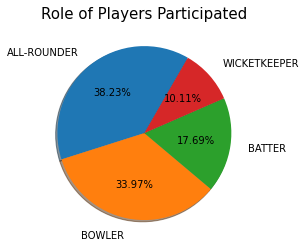

In [ ]:

#auctopact--->enables you to display the percent value using Python string formatting.
plt.pie(types.values,labels=types.index,labeldistance=1.2,autopct='%1.2f%%',shadow=True,startangle=60)
plt.title('Role of Players Participated',fontsize=15)
plt.show()


# players sold and unsold using bar graph

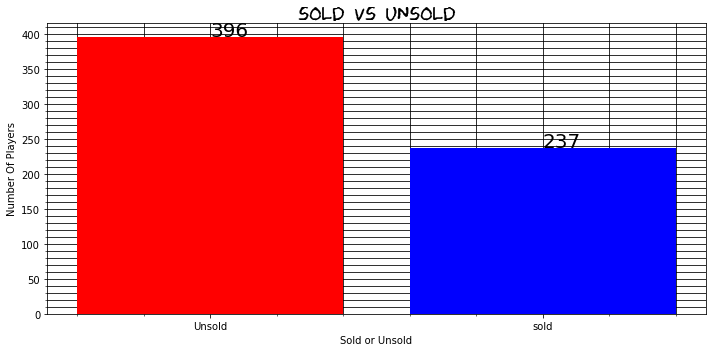

In [ ]:

#creating two plots one for sold and other for unsold
plt.figure(figsize=(10,5))
s=ipl['status'].value_counts()
s.reset_index()
c=['red','blue']
plt.bar(s.index,s.values,color=c,zorder=2)
plt.xlabel('Sold or Unsold')
plt.ylabel('Number Of Players')
plt.title('SOLD VS UNSOLD',size=20,fontfamily='fantasy',color='black',weight='bold')
plt.minorticks_on()
plt.grid(b=True,which='both',axis='both',color='black')
for index,data in enumerate(s):
    plt.text(x=index ,y=data+2,s=f'{data}',fontdict=dict(fontsize=20),color='black')

plt.tight_layout()
plt.show()

In [ ]:
#print total number of sold and unsold players in 2022 ipl auction
# v can c that the  values are matching with the above bar graph
ipl.groupby('status')['Player'].count()

status
Unsold    396
sold      237
Name: Player, dtype: int64

# total number of players bought by each team----->using countplot


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


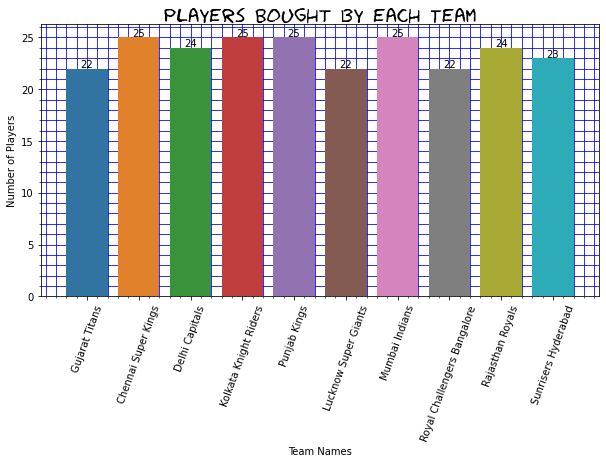

In [ ]:

# max number of players a team can purchase is 25

plt.figure(figsize=(10,5))
fig=sns.countplot(ipl[ipl['Team']!='Unsold']['Team'],zorder=2)
plt.xlabel('Team Names')
plt.ylabel('Number of Players')
plt.title('Players Bought by each Team',fontsize=20,fontfamily='fantasy')
plt.xticks(rotation=70)
plt.minorticks_on()
plt.grid(b=True,axis='both',color='blue',which='both')
plt.plot()


########################################
for p in fig.patches:
    fig.annotate(format(p.get_height(),'.0f'),(p.get_x() +
    p.get_width()/2.,p.get_height()), ha= 'center', va= 'center',
    xytext=(0,4),textcoords='offset points')

In [ ]:
#Adding 3 more columns to the dataframe ---->1-retention
#                                        ----->2-base price
#                                          ------->3-base price unit
ipl['retention']=ipl['Base Price']


In [ ]:
#jzt replacing the few of the base price values to 'From Auction'
ipl['retention'].replace(['2 Cr','40 Lakh','20 Lakh','1 Cr','75 Lakh',
                         '50 Lakh','30 Lakh','1.5 Cr'],'From Auction',inplace=True)

In [ ]:
# Treating Base Price
#replacing draft picked  to 0 in base price column
ipl['Base Price'].replace('Draft Pick',0,inplace=True)

In [ ]:
#creating two new columns base_price_unit and base_price  based on Base Price field
ipl['base_price_unit']=ipl['Base Price'].apply(lambda x:str(x).split(' ')[-1])
ipl['base_price']=ipl['Base Price'].apply(lambda x:str(x).split(' ')[0])

In [ ]:
#as some players goes retained by their team management before the auction ,thus a filed derived from the base price will
#                                                  have 0 inplace of retained
ipl['base_price'].replace("Retained",0,inplace=True)

In [ ]:
ipl.head()
# zeros refer to draft pic...in the retention filed

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,15.0,SRH,Gujarat Titans,sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,15.0,MI,Gujarat Titans,sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,10.0,KKR,Gujarat Titans,sold,From Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,9.0,RR,Gujarat Titans,sold,From Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.0,8.0,KKR,Gujarat Titans,sold,Draft Pick,0,0


In [ ]:
# total players retained and bought by each of the teams
ipl.groupby(['Team','retention'])['retention'].count()[:-1]

Team                         retention   
Chennai Super Kings          From Auction    21
                             Retained         4
Delhi Capitals               From Auction    20
                             Retained         4
Gujarat Titans               Draft Pick       3
                             From Auction    19
Kolkata Knight Riders        From Auction    21
                             Retained         4
Lucknow Super Giants         Draft Pick       3
                             From Auction    19
Mumbai Indians               From Auction    21
                             Retained         4
Punjab Kings                 From Auction    23
                             Retained         2
Rajasthan Royals             From Auction    21
                             Retained         3
Royal Challengers Bangalore  From Auction    19
                             Retained         3
Sunrisers Hyderabad          From Auction    20
                             Retained         

# DISPLAYING PLAYERS FROM EACH TEAM BASED ON TYPES OF PLAYERS

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


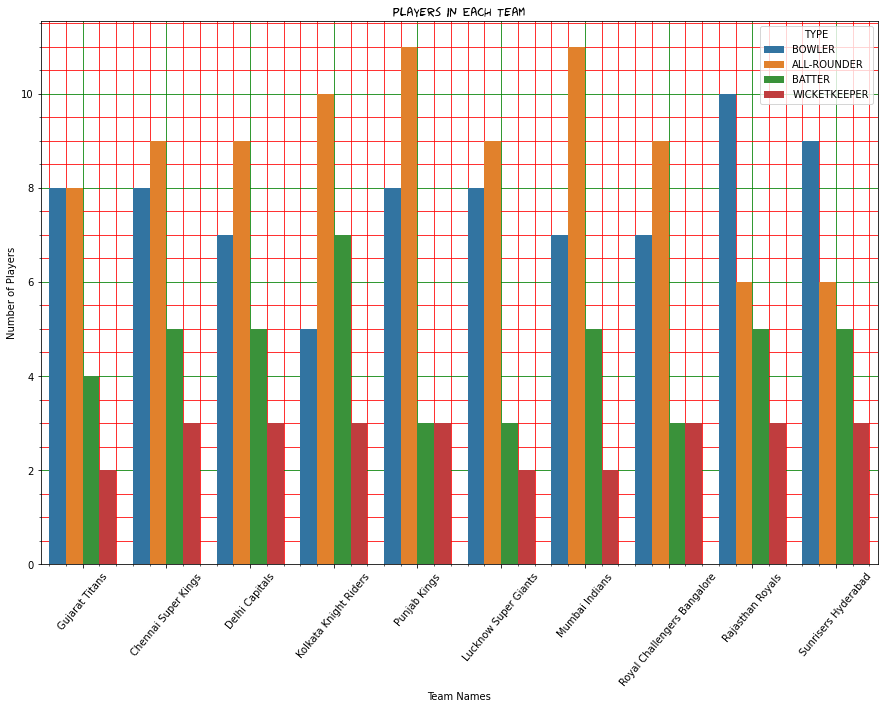

In [ ]:

#hue parameter--->for different colours
plt.figure(figsize=(15,10))
fig=sns.countplot(ipl[ipl['Team']!='Unsold']['Team'],hue=ipl['TYPE'],zorder=2)
plt.title('players in Each Team',fontfamily='fantasy')
plt.xlabel('Team Names')
plt.ylabel('Number of Players')
plt.minorticks_on()
plt.grid(b=True,color="red",which="minor")               #grid function ----to show the inner lines
plt.grid(b=True,color="green")
plt.xticks(rotation=50)
plt.show()

In [ ]:
# Heigest amount spent on a single player by each team
ipl[ipl['retention']=='From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max()[:-1].sort_values(ascending=False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Name: COST IN ₹ (CR.), dtype: float64

In [ ]:
# Player retained at maximum price
ipl[ipl['retention']=='Retained'].sort_values(by='COST IN ₹ (CR.)',ascending=False).head(1)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,16.0,CSK,Chennai Super Kings,sold,Retained,Retained,0


In [ ]:
# Top 5 Bowlers
ipl[(ipl['retention']=='From Auction') & (ipl['TYPE']=='BATTER')].sort_values(by='COST IN ₹ (CR.)',ascending=False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
71,Shreyas Iyer,2 Cr,BATTER,12.25,12.25,DC,Kolkata Knight Riders,sold,From Auction,Cr,2
193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,8.50,DC,Rajasthan Royals,sold,From Auction,Cr,1.5
217,Rahul Tripathi,40 Lakh,BATTER,8.50,8.50,KKR,Sunrisers Hyderabad,sold,From Auction,Lakh,40
100,Shikhar Dhawan,2 Cr,BATTER,8.25,8.25,DC,Punjab Kings,sold,From Auction,Cr,2
195,Devdutt Padikkal,2 Cr,BATTER,7.75,7.75,RCB,Rajasthan Royals,sold,From Auction,Cr,2


In [ ]:
#players went unsold this year who played last year
ipl=ipl.rename(columns={'2021 Squad':'Prev_Team'})


In [ ]:
unsold_player=ipl[(ipl.Prev_Team !='Not Participated') & (ipl.Team=='Unsold')][['Player','Prev_Team']]

In [ ]:
print(unsold_player)

                      Player Prev_Team
237             Suresh Raina       CSK
238              Steve Smith        DC
239          Shakib Al Hasan       KKR
240              Amit Mishra        DC
241              Adil Rashid      PBKS
242              Imran Tahir       CSK
243            Mujeeb Zadran       SRH
244               Adam Zampa       RCB
245            Rajat Patidar       RCB
246     Mohammed Azharuddeen       RCB
249             M. Siddharth        DC
252              Dawid Malan      PBKS
253              Eoin Morgan       KKR
254        Cheteshwar Pujara       CSK
255           Saurabh Tiwary        MI
257            Ishant Sharma        DC
259            Piyush Chawla        MI
260           Tabraiz Shamsi        RR
262              Sachin Baby       RCB
267              Virat Singh       SRH
269              Akash Singh        RR
273               Chris Lynn        MI
276            George Garton       RCB
288               Andrew Tye        RR
289          Sandeep Warr